# Barcode Preprocessing & Detection

### Acknowledgement: Code was referred from <a href='https://pyimagesearch.com/2014/11/24/detecting-barcodes-images-python-opencv/'>here </a> and experimented for optimal result. Credits to pyimagesearch.com.

In [112]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import image_processor as ip
from importlib import reload

reload(ip)

<module 'image_processor' from '/Users/everhett/Projects/python-ws/qr-scanner/image_processor.py'>

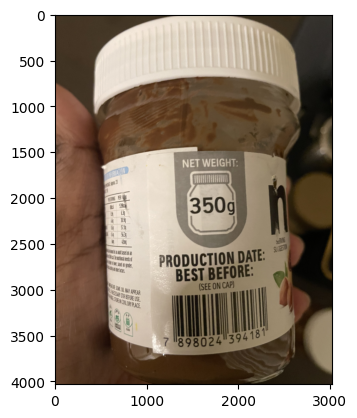

In [113]:
# Load the image as RGB.
# i = ip.load_image('resources/barcode/barcode10.png')
image = ip.load_image('resources/barcode/barcode330.JPG')
plt.imshow(image)

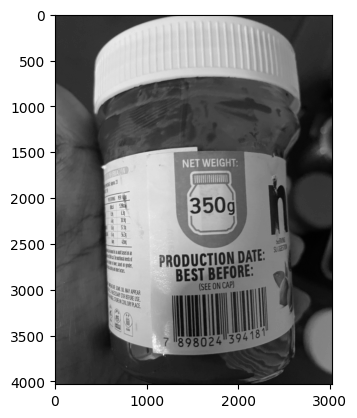

In [114]:
# Convert the image into gray for processing.
gray = ip.convert_rgb2gray(image)
plt.imshow(gray, cmap='gray')

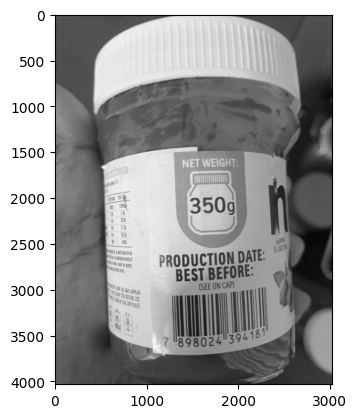

In [115]:
# Performs contrast adjustment.
gamma_corrected = ip.adjust_gamma2(gray, 0.7)
plt.imshow(gamma_corrected, cmap='gray')

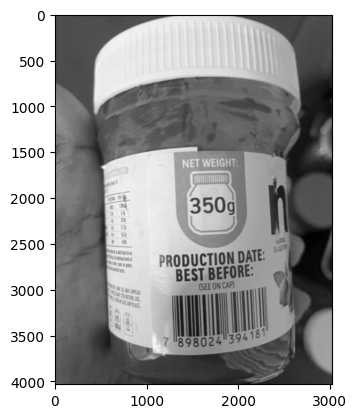

In [116]:
# Removes noise before processing.
blurred = ip.gaussian_blur(gamma_corrected, (15, 15))
plt.imshow(blurred, cmap='gray')

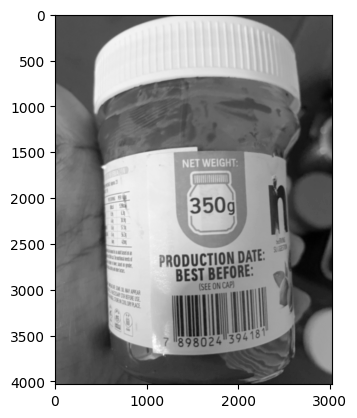

In [117]:
avg_blurred = ip.average_smooth(blurred, (9, 9))
plt.imshow(avg_blurred, cmap='gray')

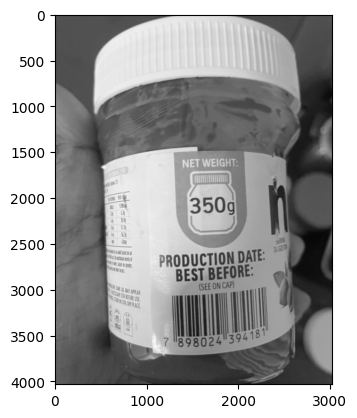

In [118]:
boosted = ip.high_boost(blurred, avg_blurred)
plt.imshow(boosted, cmap='gray')

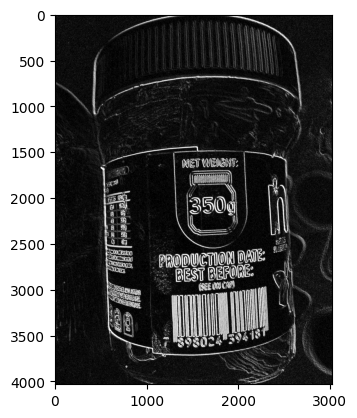

In [119]:
gradient = ip.detect_gradient(boosted)
plt.imshow(gradient, cmap='gray')

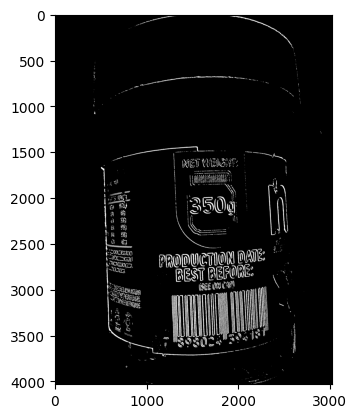

In [120]:
thresh = ip.binarize(ip.average_smooth(gradient, (3, 3)), 200)
plt.imshow(thresh, cmap='gray')

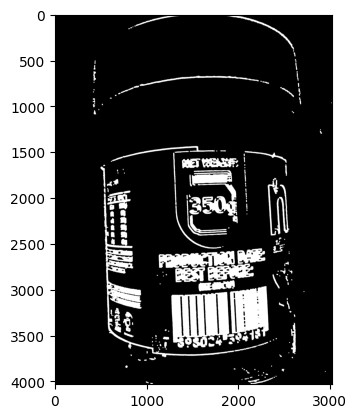

In [121]:
morphed = ip.dilate(thresh, [21, 7], 4)
plt.imshow(morphed, cmap='gray')

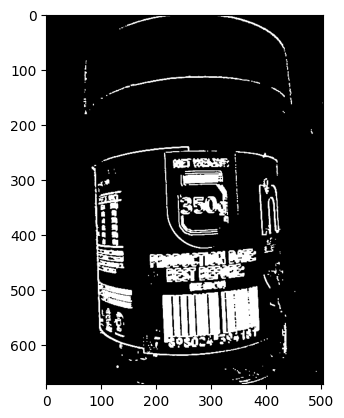

In [122]:
# Shrink
new_width = int(morphed.shape[1] / 6)
new_height = int(morphed.shape[0] / 6)

shrunk = ip.resize_image(morphed, new_width, new_height)
plt.imshow(shrunk, cmap='gray')
# Enlarge

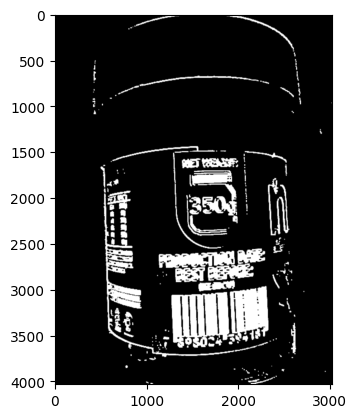

In [123]:
enlarged = ip.resize_image(shrunk, morphed.shape[1], morphed.shape[0])
plt.imshow(enlarged, cmap='gray')

In [124]:
# find the contours in the thresholded image, then sort the contours by their area, keeping only the largest one
contours, hierarchy = cv2.findContours(enlarged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
c = sorted(contours, key=cv2.contourArea, reverse=True)[0]
# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.intp(cv2.boxPoints(rect))
# draw a bounding box rounded the detected barcode and display the image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
print(f'contour len: {len(contours)}')
print(f'contour len: {len(c)}')

contour len: 147
contour len: 509


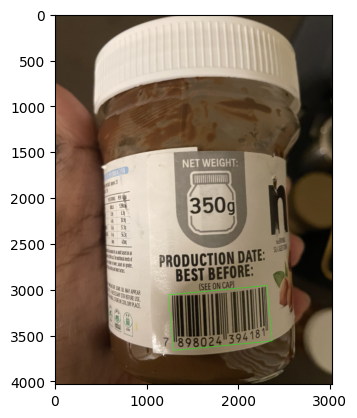

In [125]:
plt.imshow(image)

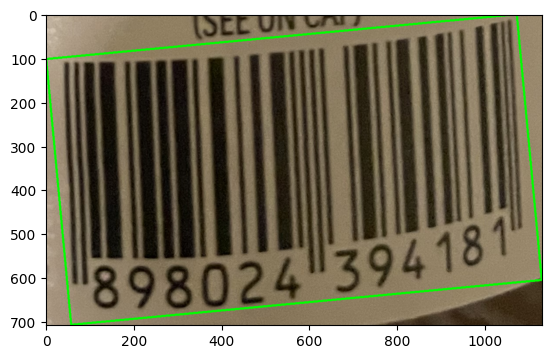

In [126]:
# plt.imshow(box)
[X, Y, W, H] = cv2.boundingRect(box)
cropped = image[Y:Y + H, X:X + W]
plt.imshow(cropped)